In [1]:
import numpy as np

### Задание №1

In [244]:
from PIL import Image

In [253]:
def contrast(path, num):#'lunar_images/lunar01_raw.jpg', 'lunar_images/lunar02_raw.jpg', 'lunar_images/lunar03_raw.jpg'
    img = Image.open(path)
    data = np.array(img)
    updated_data = np.around((data-data.min())/(data.max()-data.min())*255).astype(np.uint8)
    res_img = Image.fromarray(updated_data)
    PATH = 'lunar_images/contrast/lunar0{}_contrast.jpg'.format(num)
    res_img.save(PATH)

In [254]:
contrast('lunar_images/lunar03_raw.jpg', 3)

In [249]:
contrast('lunar_images/lunar02_raw.jpg', 2)

In [250]:
contrast('lunar_images/lunar01_raw.jpg', 1)

Первая:

![](lunar_images/contrast/lunar01_contrast.jpg)

Вторая:

![](lunar_images/contrast/lunar02_contrast.jpg)

Третья:

![](lunar_images/contrast/lunar03_contrast.jpg)

### Задание №2

In [135]:
import matplotlib.pyplot as plt

In [235]:
def avg_plot(path, w): #'signals/signal01.dat', 'signals/signal02.dat', 'signals/signal03.dat'
    y = np.loadtxt(path, dtype = float)
    x = np.linspace(0.0, 100.0, len(y))
    xf = np.linspace(0.0, 100.0, len(y))
    yf = np.cumsum(y, dtype=np.float64)
    yf[w:] = yf[w:] - yf[:-w]
    for i in range(w):
        yf[i] /= (i+1)
    yf[w:] /= w
    fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
    ax0.set_title('Сырой сигнал')
    ax0.grid(True)
    ax0.axis([0, 100, y.min()-1, y.max()+1])
    ax0.plot(x, y)
    ax1.set_title('После фильтра')
    ax1.grid(True)
    ax1.axis([0, 100, y.min()-1, y.max()+1])
    ax1.plot( x,y,xf, yf,)
    plt.show()
    
    
    

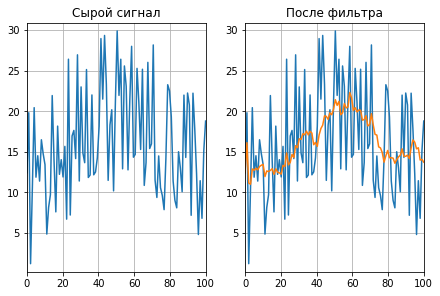

In [236]:
avg_plot('signals/signal03.dat', 10)

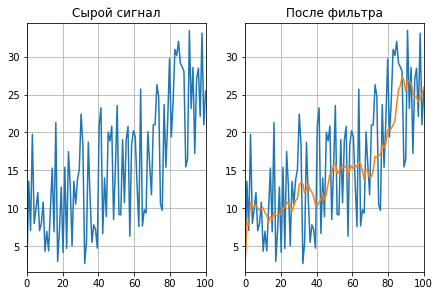

In [237]:
avg_plot('signals/signal01.dat', 10)

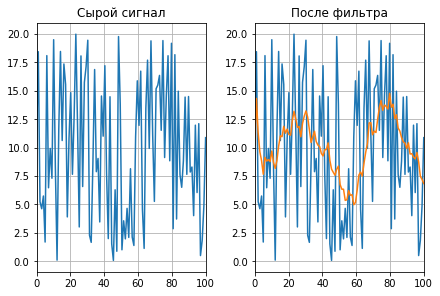

In [238]:
avg_plot('signals/signal02.dat', 10)

### Задание №3

In [307]:
y = np.array([0.0]*20 + [1.0 ,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] + [0.0]*20)
x = np.linspace(0.0, 50.0, 50)

In [308]:
A = np.eye(len(y)) #задание матрицы(заранее извиняюсь, что через цикл)
A [0][len(y)-1]=-1.
for i in range(len(y)):
    for j in range(len(y)):
        if i-j==1:
            A[i][j]=-1.

In [309]:
#  Импортируем модуль для работы с анимацией:
import matplotlib.animation as animation

In [337]:
moments = [y]
for i in range(255):
    moments.append(moments[i-1] - (0.5 * A @ moments[i-1]))



MovieWriter imagemagick unavailable; using Pillow instead.


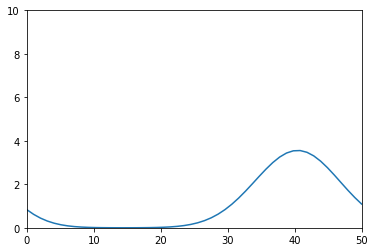

In [353]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0.0, 50.0, 50)
line, = ax.plot([], [])

def init():
    global line
    line.set_data(x, moments[0])
    return line,

def animate(i):
    global x, u, line
    line.set_data(x, u[i])
    return line,

plt.xlim(0, 50)
plt.ylim(0, 10)
animate(1)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=255, interval=5, blit=True)

anim.save('process.gif', writer='imagemagick')
